### 1. What is the data set about?
It has infromtion about various features of people from age, gender to diabetic(positive/not),region
The interested variable is insurance claim. Every row represents a person in this data set. 
Each column representing various attributes of a person 

### 2. What is the business problem? 
It is to figure out the factors responsible for a higher insurance claim. 
The effect of each factor on insurance claim, presicely.


##### 2.1. Why do we need that? 
The business bases its decisions on these factors. If a person is predicted to claim a higher insurance claim, the business might not go ahead with him/her.

Alternativey, they might target customers considering lower claim predictions as that will be more profitable. 

------> Premiums will be decided based on the predicted claims - A very important application of predicting the possible claim 

#### 2.2  After the model is built, How would they evaluate my model? or How Would they want my model output to be? 
Acceptable range of error. What is the measure you need to calculate error.

The model should output a score : A risk Score that will give an idea to the business about
    the risk level of a new customer/ application and will help them in setting a premium ( As discussed above). Its even better if a number could be associated to a class (High risk, low risk, medium risk etc.,)  

In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
# What is the data given? 
import os 
data = pd.read_csv("insurance_data.csv")

In [3]:
data.shape
#1340 rows , 10 columns 
#Does each row represent one customer? 
#Or any duplicate values present? 

(1340, 10)

In [4]:
#Checking duplicates 
data["PatientID"].value_counts()>1
#Every row talks about one customer. 

1       False
901     False
899     False
898     False
897     False
        ...  
446     False
445     False
444     False
443     False
1340    False
Name: PatientID, Length: 1340, dtype: bool

There are 1340 customers of an insurance company in this sample

In [5]:
# Before proceeding further, is the data clean? Null values? 
data.isna().sum()
#We see there are 5 nulls in age column, 3 in region. 

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

The proportion of Null values is very low 
(Generally if it is less than 40% we consider it safe to impute). Here we can go ahead with imputing 
1. Age : We can take the mean age 
2. Region: Mode should do 

In [6]:
import numpy as np

In [7]:
np.mean(data.age)
#Mean age of the people in this sample is 38.08 

38.07865168539326

In [8]:
#Imputing the values for the missing values 
data['age']=data['age'].fillna(38.08)

In [9]:
data 

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.08,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.08,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.08,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.00,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.00,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.4,106,No,0,Yes,southeast,62592.87


In [10]:
data.isna().sum() #Successfully imputed in age 

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [11]:
from scipy import stats

In [12]:
#Imputing in region 
stats.mode(data.region) 
#South east is the mode 

ModeResult(mode=array(['southeast'], dtype=object), count=array([443]))

In [13]:
data['region']=data['region'].fillna('southeast')

In [14]:
data.isna().sum() #Successfully imputed in region 

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [15]:
#Just checking if we did it right
#Id 3 age was null 
#Id 14 region was null 
data.iloc[2,:]

PatientID                3
age                  38.08
gender                male
bmi                   33.3
bloodpressure           82
diabetic               Yes
children                 0
smoker                  No
region           southeast
claim              1135.94
Name: 2, dtype: object

In [16]:
data.iloc[13,:]

PatientID               14
age                   32.0
gender                male
bmi                   27.6
bloodpressure          100
diabetic                No
children                 0
smoker                  No
region           southeast
claim              1252.41
Name: 13, dtype: object

In [17]:
#Now the data is ready to be studied. 

## 1. Univariate Analysis 

1. I want to look the the mean, and other stats of all the variabels in my data.Why do I want that? 

 A. To know the customers well 

In [18]:
data.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078657,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.082175,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


1. There are 1340 customers in this sample 
--------------------------------------------------------------------------------------------
AGE
-------------------------------------------------------------------------------------------------
2. The mean age of the customers under our analysis is 38.07 
(Can I assume the mean age of the customers of this company to be 38.07?)
Hypothesis:
"The mean age of customers of this insurance comapany is 38.07". 
3. Only 25% of the customers under our analysis are older than 47y 
(The company seems to cater to younger customers mainly)
4. 25% of the customers are younger below 29 years, not very surprising as the comapny is serving 
younger customers mainly 
-------------------------------------------------------------------------------------------------
BMI 
----------------------------------------------------------------------------------------------------
BMI is an indicator of health of individuals. 
BMI over 25 indicates obesity, BMI less than 18.5 is under weight 
1. The average BMI of the customers is : 30.66 
Many customers of this comapny are obese. 
2. 75% percent of the customers in the sample have BMI above 25. 75% in the sample are obese 
-----------------------------------------------------------------------------------------------
Blood Pressure 
-----------------------------------------------------------------------------------------------------
Presuming a high blood pressure for many customers in this sample going by their BMI. 

Blood pressure between 

(90-120) is Normal 

(140-190) is High BP (Intesity goes up as the number goes up) 

1. Mean BP of the customers in the sample is 94.15(94%). Doesn't go well will the obesity stat. Is it wrong that obese people have high BP? 
2. There are not many High BP customers in the sample.  
-------------------------------------------------------------------------------------------------
Children 
------------------------------------------------------------------------------------------------------
Number of children 
1. Only 25% of the customers have more than or equal to 2 children. 
2. Most of the customers in the sample have no child  (Can be understood as most of the customers are young)
-------------------------------------------------------------------------------------------------
Claim Amount 
------------------------------------------------------------------------------------------------------
1. Mean amount claimed is around 13000

##### We have to plot every column and see if some of the assumptions above are correct and to understand the distribution of these features.
Why do we need to look at the distribution? 

Helps us know the customers more.

Eg: how is the BMI distributed across the customers? 

In [19]:
import matplotlib.pyplot as plt

In [20]:
def graph_v2(file):
    dat=pd.read_csv(file)
    for i in dat.columns:
        if i in dat.loc[:,dat.dtypes==object] or dat[i].value_counts().count()<10: 
            #Here we are trying to get a bar plot for categorical as well as discrete numbers <10
            dat[i].value_counts().plot(kind='bar', figsize=(10,8), color='turquoise', fontsize=12, rot=0)
            plt.xlabel(i,fontsize=15)
            plt.ylabel('Frequency',fontsize=15)
            fig=plt.gcf()
            plt.show()
            #fig.savefig(i+'.jpg',dpi=100)
        else:
            plt.subplot(2,1,2)
            plt.hist(dat[i],histtype='bar',bins=20,color='turquoise',edgecolor='white')
            plt.xlabel(i)
            plt.ylabel('Frequency')

            plt.subplot(2,1,1)
            plt.boxplot(dat[i], vert=False)
            plt.title(f'Distribution of {i}')
            fig1=plt.gcf()
            plt.show()
            #fig1.savefig(i+'.jpg',dpi=100)

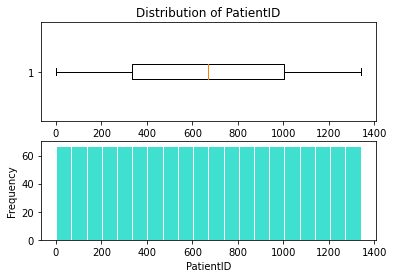

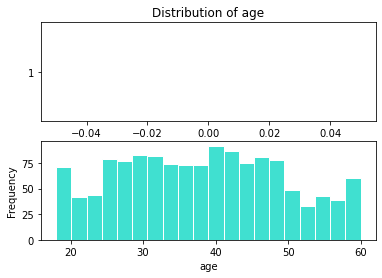

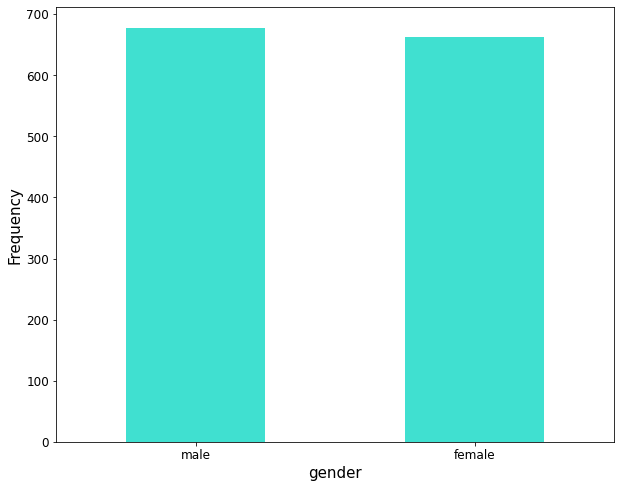

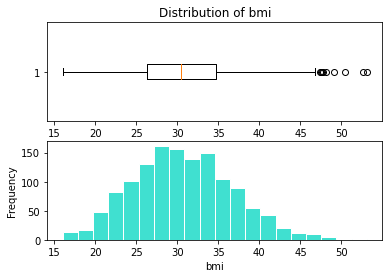

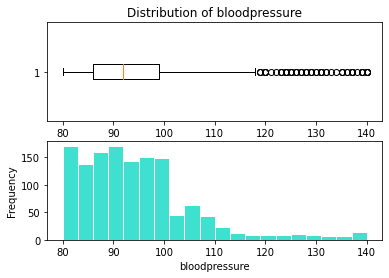

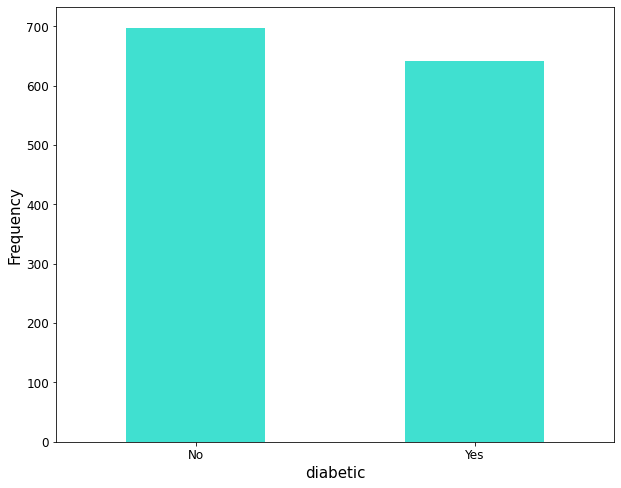

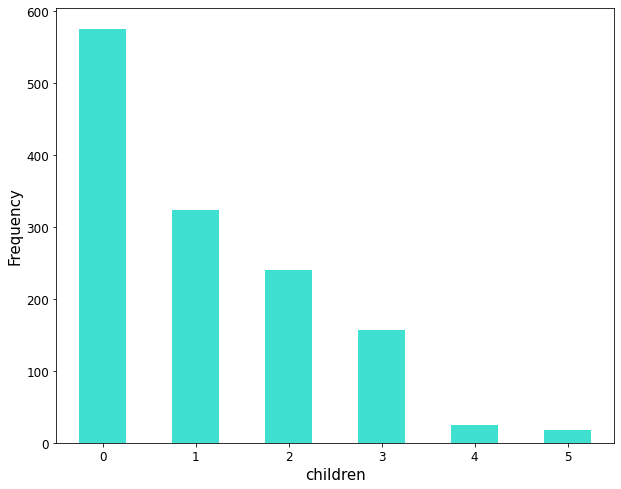

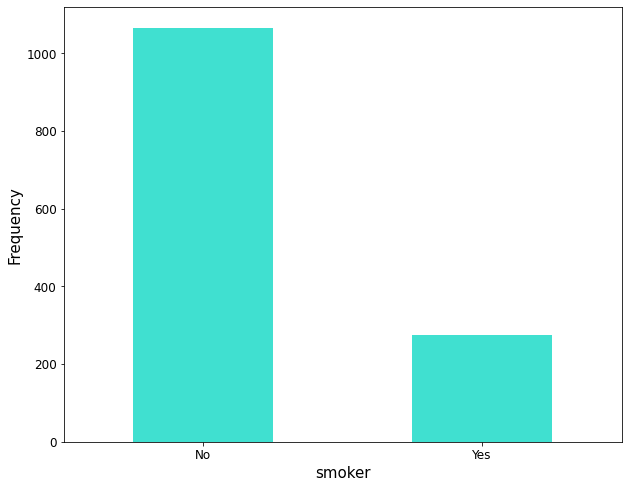

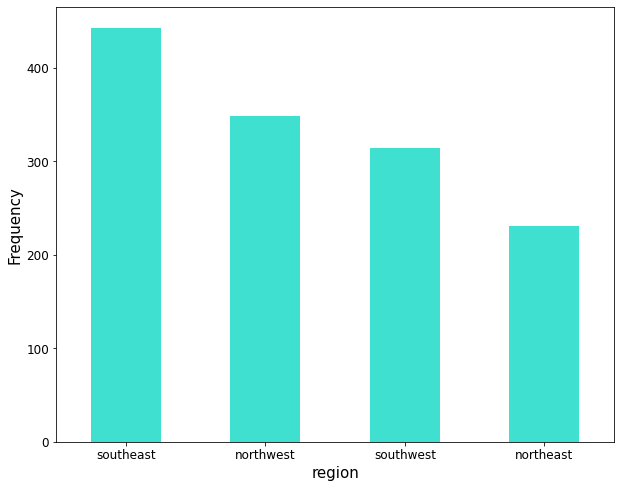

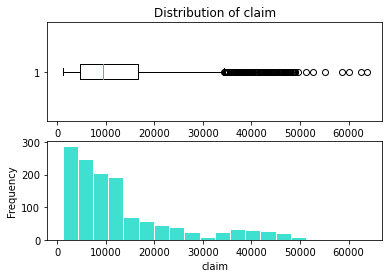

In [21]:
graph_v2("insurance_data.csv")

Univariate Analysis Findings: 
------------------------------------------------------------------------------
AGE
------------------------------------------------------------------------------
1. We found that most of the customers are younger, with less than 38 years.Younger People might not claim insurance unless in exceptional circumstances. We assume, elder people might claim more because of health issues.  
---------------------------------------------------------------------------
Gender
---------------------------------------------------------------------------
1. Men tend to work in riskier environment, there are chances that they are at higher risk, they might claim insurnce more than women (Assumption) 
Men and women are almost equal in this sample. For the regression model, the impact might not be great
------------------------------------------------------------------------
Diabetic 
----------------------------------------------------------------------------
1. The portion of people with diabetes is only slightly lesser than the peole not with diabetes. Almost 50% have diabetes. 
This is expected as we saw that most of the customers didn't have a healthy BMI. 
------------------------------------------------------------------------
BMI
-------------------------------------------------------------------------------
It is normally distributed with a mean at 30.6.Meaning, highest number of customers have a BMI @30 which is concerning. 
Most customers seem to have a sedentary lifestyle which might result in many diseases. 
We assume BMI will have a very high effect on insurance claim. 
High BMI> Diseases> More claim >More risk 

-----------------------------------------------------------------------------
Blood Pressure
--------------------------------------------------------------------------------
It is right skewed. Meaning there are people with very high blood pressure, in this case from 120 - 140. 
Majority of the customers have Blood pressure in acceptable range. Isn't this strange? 

### H1: If population BMI is high, Blood pressure will be >=120. Test this Hypothesis 
1. Alternate: Mu<120 #Left tail test 
2. Null : mu>=120 
3. Taking 95% Confidence interval 

In [22]:
pd.DataFrame(data.iloc[:,3:5])

,bmi,bloodpressure
0,23.2,91
1,30.1,87
2,33.3,82
3,33.7,80
4,34.1,100
...,...,...
1335,35.5,88
1336,38.1,120
1337,34.5,91
1338,30.4,106


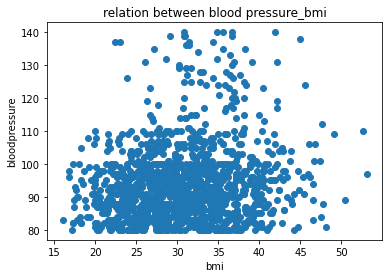

In [23]:
import matplotlib.pyplot as plt

plt.scatter(data.bmi,data.bloodpressure)
plt.title('relation between blood pressure_bmi')
plt.xlabel('bmi')
plt.ylabel('bloodpressure')
plt.show()

###  H1.1 : Doing a Correlation test for the same 
-----------------------------------------------------------
**Using Pearosnr**

In [24]:
from scipy import stats
from scipy.stats.stats import pearsonr

In [25]:
pearsonr(data.bmi,data.bloodpressure)
#corcoeffpearson's = 0.143
#The p-value is closer to zero which means the null hypothesis is rejected. 
#So the customers in the company have no correlation betweeen BMI and BP.

(0.14354385196831979, 1.3130594023727544e-07)

--------------------------------------------------------------------------
Smokers
------------------------------------------------------------------------------
1. Very less number of smokers 
2. We assume that smokers will claim more 
--------------------------------------------------------------------------
Region 
-----------------------------------------------------------------------------
1. Less customers from Northeast Region - More Untapped potential for the company. 
2. Highest number of customers from north east region. 
3. However, the customers are distributed well among south east, northwest,south west regions. 
Why is the 3rd point relevant? 
say a seasonal disease affects people in south east region, the company knows they will have more claims. That makes them more risky. 

However, those external factors are not mentioned in our data. So the most we can do is find the correlation between region and claim. 

-----------------------------------------------------------------------------
Claim
----------------------------------------------------------------------------------
1. Distribution is right Skewed becasue of the outliers towards the higher end. There are customers who claimed very high compared to 75% of the claims made by customers 


-----------------------------------------------------
------------------------------------------------------

## 2. Bivariate Analysis

Dropping patient ID from the analysis becasue it is not adding any value here

In [26]:
df = data

In [27]:
df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.08,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.08,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.08,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.00,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.00,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.4,106,No,0,Yes,southeast,62592.87


In [28]:
df = df.drop(['PatientID'],axis=1)
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.00,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.00,male,30.1,87,No,0,No,southeast,1131.51
2,38.08,male,33.3,82,Yes,0,No,southeast,1135.94
3,38.08,male,33.7,80,No,0,No,northwest,1136.40
4,38.08,male,34.1,100,No,0,No,northwest,1137.01


## 2.1 Pair wise plot - Gallery 
# -----------------------------------------------------------------------------------------------------------

1. This will help us see if there is any clear trend between some varaibles. 
2. We will take these inferences and explore further

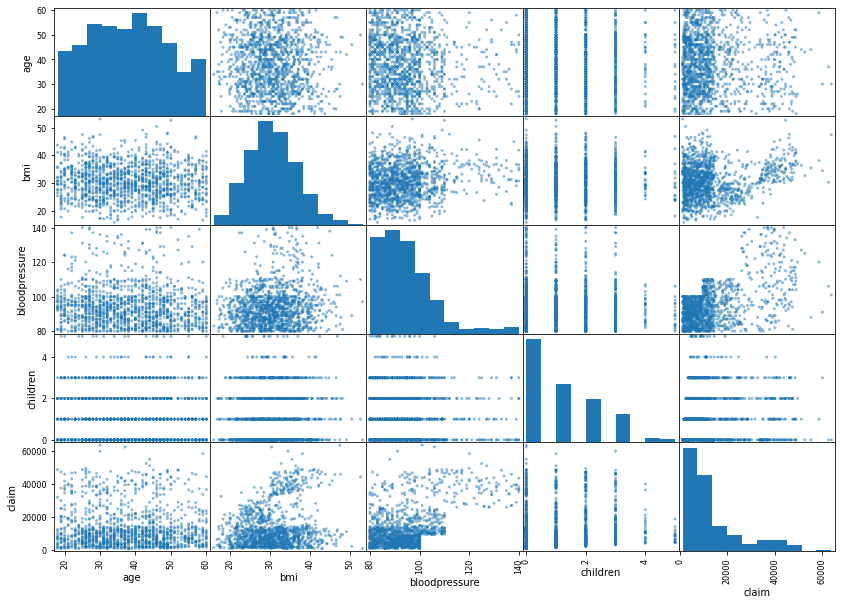

In [29]:
#Seeing pair wise right now 
#This gives us a Bird's eye view of how variables are related to each other. 
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha = 0.5,
               figsize = (14,10),diagonal = 'hist')
plt.show()

In [30]:
corr = df.corr()
corr.style.background_gradient()

,age,bmi,bloodpressure,children,claim
age,1.000000,-0.041919,-0.060247,-0.025508,-0.027857
bmi,-0.041919,1.000000,0.143544,0.012092,0.197401
bloodpressure,-0.060247,0.143544,1.000000,-0.031682,0.531341
children,-0.025508,0.012092,-0.031682,1.000000,0.069233
claim,-0.027857,0.197401,0.531341,0.069233,1.000000


## 2.1.1 What are the variables that have high correlation with claim?  
(Note: Categorical variables are not included. We will do a correlation check of categorical variables using ...............................)
1. Blood pressure has the highest correlation with claim amount. Correlation Percentage : 53%
2. BMI has the second highest correlation with claim amount. Correlation percentage: 19.7 ~ 20%
The rest of the variables : Age, Children has a very less correlation. This is expected as the scatter plots above showed the same thing. There was no any clear relationship observed. 

##  2.1.2 Findings 
---------------------------------------------
**1. Age - Claim** 
---------------------------------------------
1. Age is not displaying any clear trend with claim. 

2. To study age further, we will look at the box-plots.

3. This clearly contradicts our assuption that older people claim more.

**We assumed a linear upward trend between age and claim and that is contradicted here**

----------------------------------------------
**2. BMI - Claim**
----------------------------------------------
1. We see a linear upward trend for a set of customers. As the BMI increases the claim seems to increase.

2. A majority of customers with higher BMI don't seem to be claiming more, they seem to be claiming just like their lower BMI counterparts. 

**So, for the customers for whom a clear upward trend is seen, are there other factors affecting this? 
Like BP, smokers?** 

-------------------> This will be checked in our Multivariate Analysis 

---------------------------------------------------
**3. Blood Pressure - claim**
----------------------------------------------------------------
1. There is some interesting and specific trend that is seen here 

2. A cut off at 100units(bp) is seen. Below 100 Bp, majority of the claims seem to be concentrated below a claim of 15000(approx).  

3. Once the **BP crosses 100, no customer has a claim below 15,000 units**. So it can be clearly seen that an applicant with BP > 100 is a clear risky applicant. They have a very high chance of claiming more. 

4. **110 also seems like some kind of cutoff above which no customer has a claim below 30,000 units.**
5.--------------> **We will use bucketing to segregate the customers with the above cutoffs : 100 BP,110 BP**. 
-----------------------------------------------------
## 4. Children - Claim 
1. The scatter plot is not giving much information about claim in case of children 

2. We need to look at the **box plots for this to understand better** 



-------------------------------------------------------
In the above plots we missed these variables as they are categorical in the data set 
1. Gender 
2. Diabetic 
3. smoker. 

We will look at the bar plots here 

----------------------------------------------


## 5. Gender - Claim 

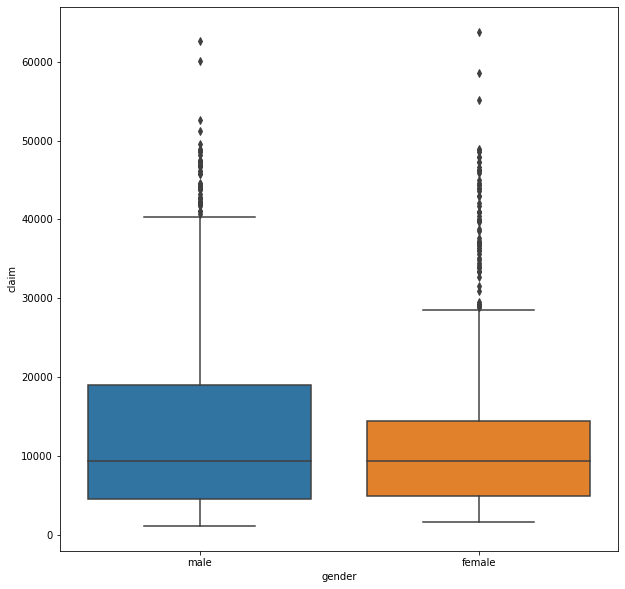

In [31]:
sns.boxplot(x = "gender",y= "claim",data = df)
plt.gcf().set_size_inches(10, 10)
plt.show()
# Significant claims seen in men compared to women 

### 5.1 Findings 
----------------------------------------------------
1. We see that the median and minimum claims of men and women are nearly similar. 

**Is the average claims of men and women same?** 

We will do a Hypothesis testing here to check it. Expecting that they won't be similar. As the distributions are really different.

### 5.1.1 Hypothesis testing 
**Is the mean claim of men and women same in the population?**

#A chi_square test of independence needs to be done here. 

---------------------------------------------
###### Getting requisite values from data
--------------------------------------------

In [32]:
# Getting the  mean claim by the gender
df.groupby(["gender"])['claim'].mean()


gender
female    12569.578897
male      13919.790457
Name: claim, dtype: float64

The difference in the mean claim of men and women is 1,350 dollars. 

In [33]:
# Getting the std of the claim by the gender
df.groupby(["gender"])['claim'].std()

gender
female    11128.703817
male      12969.700466
Name: claim, dtype: float64

In [34]:
# Getting the count of female and male respectively
df.groupby(["gender"]).count()

,age,bmi,bloodpressure,diabetic,children,smoker,region,claim
gender,,,,,,,,
female,662,662,662,662,662,662,662,662
male,678,678,678,678,678,678,678,678


------------------------------------
##### Hypothesis Test 
-----------------------------------------

##### Null Hypothesis: The average claim of the men and women is equal
##### Alternate Hypothesis: The average claim of the men and women is not equal

In [35]:
# H0 : Mean(mean) = mean(women), so x1-x2 = 0 #Two tail test 
# Ha : mean(men) != mean(women)
alpha = 0.05 
x1 = 12569.578897 #Female
x2= 13919.790457 #Male
sig1 = 11128.703817 #Female
sig2 = 12969.700466 #Male 
n1 = 662 #Fm 
n2 = 678 #M
z = (x1-x2)/((sig1**2/n1)+(sig2**2/n2))**0.5
z
# using the Z static method

-2.046753579049191

In [36]:
zcrit = stats.norm.ppf(0.05/2)
zcrit

-1.9599639845400545

In [37]:
#Using the p value method 
2*stats.norm.cdf(-2.046)

0.040756370674284524

Null Hypothesis is rejected.

-----------------------------------------------
###### Conclusion : 

1. Z- stat is less than z critical 
2. P- value is less than the significance level 
3. So, we conclude that **for the population, there is a statistically significant difference between average claims of men and women**. 

2. Like assumed, the maximum claim for women is much lesser than the maximum claim for men. 

3. For the 50% of women, the claim is not as widely distributed as claims for men. 

4. So, though the average claim of men and women seems equal, there is a higher chance for men to claim more than 10,000 units ( In the distribution, 50% of the customers fall in this category). 

## 6. Diabetic - Claim 
1. Like already mentioned, we are assuming that having diabetes will make a difference in the claim amount. It will be more. Let's see that. 

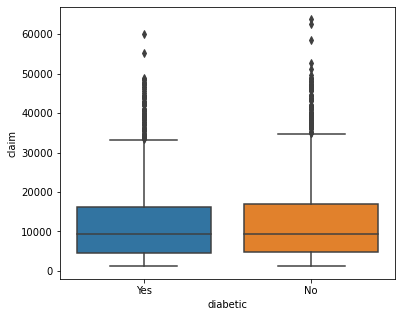

In [38]:
sns.boxplot(x = "diabetic",y= "claim",data = df)
plt.gcf().set_size_inches(6, 5)

plt.show()
#Daiabetic mean claim seems same. Which is odd. So we are testing to see if they are really equal 
#The distributions of both the claims look same. 
#Even the mean is same? Is the average claim of diabetic and non diabetic patients same?

# 6.1 Hypothesis
## Our Claim : 
The average claim of diabetic patients and non diabetic patients will be different.   
H0 : The average claim of diabetic and non diabetic patients are same.  
H1 : The average claim of diabetic and non diabetic patients are different. 

In [39]:
# Getting the mean claim for customers with and without diabetes
df.groupby(["diabetic"])['claim'].mean()

diabetic
No     13354.031991
Yes    13142.624346
Name: claim, dtype: float64

In [40]:
# Getting the standard deviation of claim for customers with and without diabetes
df.groupby(["diabetic"])['claim'].std()

diabetic
No     12275.376160
Yes    11935.356153
Name: claim, dtype: float64

In [41]:
# Getting the count of customers with and without diabetes
df.groupby(["diabetic"])['claim'].count()

diabetic
No     698
Yes    642
Name: claim, dtype: int64

In [42]:
# H0 : mean claim(diabetes) = mean claim(without diabetes)
# HA : mean claim(diabetes) != mean claim(without diabetes) 

alpha = 0.05 
x1 = 13142.62  #yes
x2 = 13354.03 #no
sig1 = 11935.35
sig2 = 12275.37
n1 = 642
n2 = 698 
z = (x1-x2)/((sig1**2/n1)+(sig2**2/n2))**0.5
z
pv = stats.norm.cdf(-0.31)
z, pv  
#Alpha = 0.05 

(-0.3195235063532939, 0.3782804781779807)

##### We fail to reject null hypothesis as pvalue>alpha. The difference in mean claim between people with diabetic and people without diabetic is not statistically significant.

## 7. Children - Claim 
We did not observe any clear pattern between number of children and claim amount. We should look at boxplots to figure out if we can get any insights

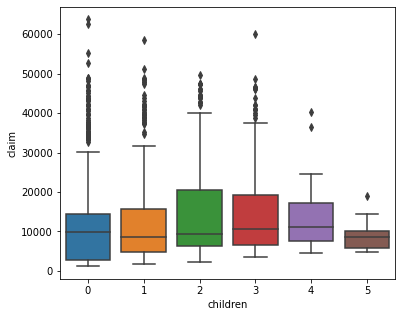

In [43]:
sns.boxplot(x = "children",y= "claim",data = df)
plt.gcf().set_size_inches(6, 5)

plt.show()

## 7.1 Observations: 
1. The distribution of claims for people with 2 and 3 children is more spread out than for others. This means that, if a person has 2/3 children, there is a higher chance for him to claim an amount more than 10K units which seems to be the median claim of every category 
2. For people with 5 children, the claim amount is not even above 20K units. 
3. For other categories it is similar, with 4 children category claiming a maximum of around 25K. the other two categories are at a maximum claim of 30K 
4. **This, doesn't show any clear trend**
5. Assuming that correlation between number of children and claim amount will come out to be very low. Is that so? 

## 7.1.2 Feature Engineering idea : Can reducing to two or three categories as having and not having children make a difference on the amount claimed? 
This comes from the assumption that people with children will cover their family (including Children) in their insurance policy. 
We have to make these two bins and see if that makes a difference in claim amounts. 

In [45]:
df.children

0       0
1       0
2       0
3       0
4       0
       ..
1335    0
1336    1
1337    3
1338    0
1339    0
Name: children, Length: 1340, dtype: int64

In [46]:
# Changing the children column as 0 and 1. 0 representing people with no children and 1 representing people with 1 or more
# children, in our case 1,2,3,4,5 childrens are classified as 1.

# children 0 = 0 , 1,2,3,4,5 = 1
df["children"] = df["children"].replace([1,2,3,4,5], 1)

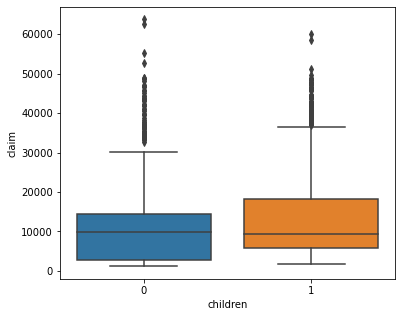

In [47]:
sns.boxplot(x = "children",y= "claim",data = df)
plt.gcf().set_size_inches(6, 5)

plt.show()

## 7.1.2.1 Observations: 
1. Maximum claim of people with children is higher than people with no children. This does't adequately justify that people with children claim more. 
2. Looking at Q3, among the 25% of the customers with children, claim is spread out between 10K - nearly 20K, for no children the spread is almost half. 
3. Now, will this tell us that, if a person with children has high chance of claiming more? 

# 8. Smoker

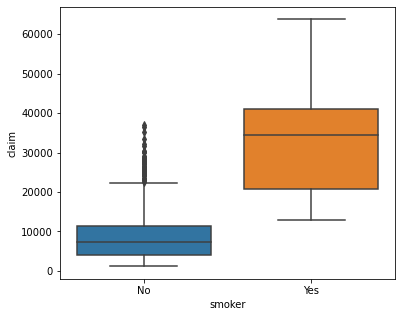

In [48]:
# Getting the boxplot for smoker and claim
sns.boxplot(x = "smoker",y= "claim",data = df)
plt.gcf().set_size_inches(6, 5)

plt.show()

### Observation:  
From the above boxplot, it is clearly understood that the people who smoke claim more amount compared to people who do not smoke.

## 9. Region

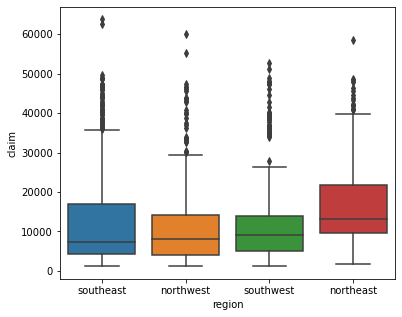

In [49]:
sns.boxplot(x = "region",y= "claim",data = df)
plt.gcf().set_size_inches(6, 5)

plt.show()
# All regions seem to have a same mean claim. Is the claim difference between these regions statistically significant? 

## Hypothesis: 
**Null Hypothesis: Mean claim of all 3 regions - Southeast, Northwest and Southwest is same**  
**Alternate Hypothesis: Mean claim of all 3 regions - Southeast, Northwest and Southwest are not same**

We are including only the above 3 regions to test the mean claim because from the above boxplot we can clearly see that mean claim of the northeast region is higher compared to the other 3 regions.   
Hence, we are excluding the northeast region from our hypothesis test.

In [50]:
# 3 populations so doing an ANOVA test 
#Creating a list of 3 separate samples from region column and preparing the data for ANOVA test
region = df.region.tolist()

In [51]:
n1 = 446 #south east 
n2 = 349 #north west 
n3 = 314 #south west
n = n1+n2+n3
r = 3

In [52]:
#Creating a list of claims and combining region and claim in a new dataframe
claim = df.claim.tolist()
region_claim = pd.DataFrame(np.column_stack([region, claim]), 
                               columns=['region', 'claim'])
region_claim

,region,claim
0,southeast,1121.87
1,southeast,1131.51
2,southeast,1135.94
3,northwest,1136.4
4,northwest,1137.01
...,...,...
1335,northwest,55135.4
1336,northeast,58571.07
1337,northwest,60021.4
1338,southeast,62592.87


In [53]:
# Pivoting the new dataframe with column names as regions and their claims
region_claim=region_claim.pivot(columns='region', values='claim')
region_claim

region,northeast,northwest,southeast,southwest
0,NaN,NaN,1121.87,NaN
1,NaN,NaN,1131.51,NaN
2,NaN,NaN,1135.94,NaN
3,NaN,1136.4,NaN,NaN
4,NaN,1137.01,NaN,NaN
...,...,...,...,...
1335,NaN,55135.4,NaN,NaN
1336,58571.07,NaN,NaN,NaN
1337,NaN,60021.4,NaN,NaN
1338,NaN,NaN,62592.87,NaN


In [54]:
# creating a list of claim for the region southeast
southeast=region_claim[~region_claim['southeast'].isnull()]
southeast=southeast.southeast.tolist()
southeast

['1121.87',
 '1131.51',
 '1135.94',
 '1252.41',
 '1253.94',
 '1256.3',
 '1391.53',
 '1515.34',
 '1532.47',
 '1534.3',
 '1607.51',
 '1615.77',
 '1621.88',
 '1622.19',
 '1629.83',
 '1631.67',
 '1631.82',
 '1633.04',
 '1633.96',
 '1634.57',
 '1665.0',
 '1674.63',
 '1719.44',
 '1720.35',
 '1725.55',
 '1727.54',
 '1815.88',
 '1824.29',
 '1837.28',
 '1877.93',
 '1880.07',
 '1981.58',
 '1984.45',
 '1986.93',
 '2020.55',
 '2026.97',
 '2137.65',
 '2155.68',
 '2156.75',
 '2196.47',
 '2198.19',
 '2200.83',
 '2201.1',
 '2203.47',
 '2203.74',
 '2205.98',
 '2207.7',
 '2211.13',
 '2217.47',
 '2217.6',
 '2219.45',
 '2304.0',
 '2322.62',
 '2395.17',
 '2396.1',
 '2438.06',
 '2457.21',
 '2459.72',
 '2464.62',
 '2473.33',
 '2480.98',
 '2483.74',
 '2497.04',
 '2498.41',
 '2566.47',
 '2585.85',
 '2689.5',
 '2721.32',
 '2727.4',
 '2731.91',
 '2741.95',
 '2801.26',
 '2867.12',
 '2902.91',
 '2927.06',
 '3056.39',
 '3171.61',
 '3180.51',
 '3227.12',
 '3238.44',
 '3366.67',
 '3392.37',
 '3392.98',
 '3393.36',
 '

In [55]:
# creating a list of claim for the region northwest
northwest=region_claim[~region_claim['northwest'].isnull()]
northwest=northwest.northwest.tolist()
northwest

['1136.4',
 '1137.01',
 '1137.47',
 '1141.45',
 '1146.8',
 '1149.4',
 '1163.46',
 '1241.57',
 '1242.26',
 '1242.82',
 '1149.4',
 '1621.34',
 '1625.43',
 '1627.28',
 '1628.47',
 '1632.04',
 '1632.56',
 '1635.73',
 '1639.56',
 '1639.56',
 '1646.43',
 '1704.7',
 '1705.62',
 '1708.0',
 '1708.93',
 '1711.03',
 '1712.23',
 '1769.53',
 '1906.36',
 '1909.53',
 '1917.32',
 '1969.61',
 '1972.95',
 '1977.82',
 '1980.07',
 '2045.69',
 '2055.32',
 '2117.34',
 '2128.43',
 '2130.68',
 '2134.9',
 '2136.88',
 '2138.07',
 '2221.56',
 '2250.84',
 '2254.8',
 '2257.48',
 '2261.57',
 '2302.3',
 '2352.97',
 '2362.23',
 '2404.73',
 '2523.17',
 '2527.82',
 '2534.39',
 '2639.04',
 '2643.27',
 '2680.95',
 '2690.11',
 '2699.57',
 '2709.11',
 '2709.24',
 '2710.83',
 '2719.28',
 '2730.11',
 '2775.19',
 '2789.06',
 '2803.7',
 '2842.76',
 '2850.68',
 '2855.44',
 '3021.81',
 '3062.51',
 '3077.1',
 '3176.29',
 '3176.82',
 '3201.25',
 '3292.53',
 '3353.47',
 '3537.7',
 '3556.92',
 '3579.83',
 '3594.17',
 '3736.46',
 '38

In [56]:
# creating a list of claim for the region southwest
southwest=region_claim[~region_claim['southwest'].isnull()]
southwest=southwest.southwest.tolist()
southwest

['1261.44',
 '1261.86',
 '1263.25',
 '1526.31',
 '1682.6',
 '1727.79',
 '1728.9',
 '1731.68',
 '1737.38',
 '1743.21',
 '1744.47',
 '1748.77',
 '1759.34',
 '1826.84',
 '1832.09',
 '1837.24',
 '1842.52',
 '1875.34',
 '1880.49',
 '1964.78',
 '2007.95',
 '2020.18',
 '2103.08',
 '2150.47',
 '2154.36',
 '2166.73',
 '2331.52',
 '2416.96',
 '2457.5',
 '2494.02',
 '2585.27',
 '2597.78',
 '2632.99',
 '2866.09',
 '2904.09',
 '2913.57',
 '2974.13',
 '3161.45',
 '3172.02',
 '3208.79',
 '3260.2',
 '3277.16',
 '3353.28',
 '3378.91',
 '3410.32',
 '3443.06',
 '3484.33',
 '3554.2',
 '3578.0',
 '3591.48',
 '3597.6',
 '3659.35',
 '3693.43',
 '3761.29',
 '3847.67',
 '3906.13',
 '3987.93',
 '3989.84',
 '4076.5',
 '4149.74',
 '4234.93',
 '4260.74',
 '4391.65',
 '4402.23',
 '4529.48',
 '4536.26',
 '4646.76',
 '4670.64',
 '4687.8',
 '4746.34',
 '4751.07',
 '4762.33',
 '4766.02',
 '4830.63',
 '4883.87',
 '4931.65',
 '4934.71',
 '5003.85',
 '5012.47',
 '5080.1',
 '5152.13',
 '5240.77',
 '5246.05',
 '5253.52',
 '

In [57]:
# creating a list of claim for the region northeast
northeast=region_claim[~region_claim['northeast'].isnull()]
northeast=northeast.northeast.tolist()
northeast

['1694.8',
 '1702.46',
 '1704.57',
 '1967.02',
 '2102.26',
 '2104.11',
 '2755.02',
 '2897.32',
 '2899.49',
 '3044.21',
 '3046.06',
 '3070.81',
 '1704.57',
 '3167.46',
 '3206.49',
 '3213.62',
 '3268.85',
 '3279.87',
 '3309.79',
 '3385.4',
 '3645.09',
 '3732.63',
 '3857.76',
 '3861.21',
 '3925.76',
 '3943.6',
 '4005.42',
 '4040.56',
 '7935.29',
 '7985.82',
 '7986.48',
 '8252.28',
 '8302.54',
 '8334.46',
 '8334.59',
 '8342.91',
 '8534.67',
 '8538.29',
 '8603.82',
 '8604.48',
 '8606.22',
 '8627.54',
 '8688.86',
 '8823.99',
 '8891.14',
 '8964.06',
 '9095.07',
 '9222.4',
 '9225.26',
 '9282.48',
 '9288.03',
 '9290.14',
 '9361.33',
 '9411.01',
 '9432.93',
 '9447.25',
 '9447.38',
 '9500.57',
 '9541.7',
 '9617.66',
 '9704.67',
 '9715.84',
 '9722.77',
 '9778.35',
 '9866.3',
 '9875.68',
 '9957.72',
 '9964.06',
 '10043.25',
 '10072.06',
 '10106.13',
 '10141.14',
 '10197.77',
 '10370.91',
 '10407.09',
 '10422.92',
 '10435.07',
 '10564.88',
 '10736.87',
 '10796.35',
 '10797.34',
 '10923.93',
 '11165.

In [58]:
# normality tests for the 3 regions - southeast, nothwest and southwest
stats.shapiro(southeast),stats.shapiro(northwest),stats.shapiro(southwest)
#pvalue > alpha(0.05). Hence the null is accepted that the claims of the 3 regions are normally distributed.

C:\Users\sreek\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


(ShapiroResult(statistic=1.0, pvalue=1.0),
 ShapiroResult(statistic=1.0, pvalue=1.0),
 ShapiroResult(statistic=1.0, pvalue=1.0))

In [59]:
# performing ANOVA test on the 3 regions
# alpha = 0.05
f_test, p_val = stats.f_oneway(southeast, northwest, southwest)
print(f_test)
print(p_val)

1.2233297842427946
0.29464658140230515


**pvalue > alpha(0.05). Hence, our null hypothesis is accepted.  Mean claim of all 3 regions - Southeast, Northwest and Southwest are similar.**

**Since the claims for these 3 regions - Southeast, Northwest and Southwest, we are now clubbing these 3 regions into 1 region. We are now checking how much difference in claims between Northeast region and Other regions.**

In [60]:
df.region

0       southeast
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1335    northwest
1336    northeast
1337    northwest
1338    southeast
1339    southeast
Name: region, Length: 1340, dtype: object

In [61]:
#clubbing the regions as other
df["region"] = df["region"].replace(['southeast','northwest','southwest'], 'other')
df.region

0           other
1           other
2           other
3           other
4           other
          ...    
1335        other
1336    northeast
1337        other
1338        other
1339        other
Name: region, Length: 1340, dtype: object

In [62]:
#Checking the count in the northeast and other regions
df.groupby(["region"])['claim'].count()

region
northeast     231
other        1109
Name: claim, dtype: int64

In [63]:
#Checking the mean for northeast and other regions
df.groupby(["region"])['claim'].mean()

region
northeast    16889.044719
other        12495.319955
Name: claim, dtype: float64

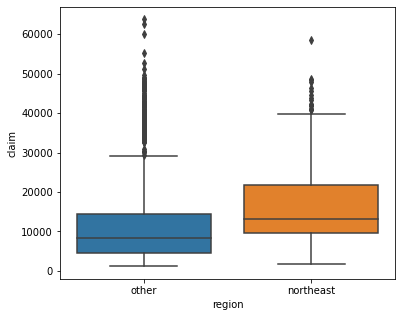

In [64]:
# plotting the graph for region (other vs northest) 
sns.boxplot(x = "region",y= "claim",data = df)
plt.gcf().set_size_inches(6, 5)

plt.show()

## Observations: 
1. Maximum claim of people living in northeast region is more compared to people living in other regions. 
2. Looking at Q3, for people living in northeast region, the claim is more spread out between nearly 15K - 20K. Whereas for people living in other regions, the claim is much lesser than 15K.  


# ---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------

## Which Models to choose? 

To decide which Model to fit, we are considering the target variable and the features. 

The target variable: Claim is a continuous variable. 

And, we would like to look at the effect of each feature on the amount claimed. This will be clearly seen in Linear Regression Model. 


Going ahead with **Linear Regression Model** for our first experiment. 

## Experiment 1 

Features: 
1. Smoking 

We will fit the model with only smoking. 